<a href="https://colab.research.google.com/github/adrien50/Porto-Seguro-s-Safe-Driver-Prediction/blob/master/portoassuranceclaimprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Porto Seguro’s Safe Driver Prediction**

**Predict if a driver will file an insurance claim next year**


Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.
Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.
In this project, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers. [Data Preparation & Exploration](https://www.kaggle.com/bertcarremans/data-preparation-exploration) from kaggle was a great help


**Commercial Importance of project:**

For providing a fairer insurance cost on the basis of individual driving habits.

High cost for drivers who are likely to claim insurance next year and low cost for drivers who are less likely to claim insurance

Prediction helps to customize insurance products with customers’ habits

A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

It is sponsored by Porto Seguro - a major car and home insurance company in Brazil

**Data structure and content:-**

Data consist of one target variable (0/1) where 0 means customer didn’t claim insurance and 1 means customer claimed insurance
We have 79 predictor variables, which are grouped into feature names (e.g., ind, reg, car, calc )

“Ind” is related to individual or driver

“reg” is related to region

“car” is related to car

“calc” is an calculated feature

Features have suffix ( “bin” and “Cat”)

Bin : indicates it is binary feature

Cat : indicates it is categorical feature


**File descriptions**

•	train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.  (‘target’ is target label)


**Type of Machine Learning Problem**

It is a classification problem to predict the data point belongs to 0 or 1 class.

0 ---> no claim's for insurance

1 ---> claim's for insurance

**Import the packages and load the training data**

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier, PassiveAggressiveClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
from sklearn import metrics
import math
import pickle

# Modify the display option to view the entire database
pd.options.display.max_columns = None


**Loading data**

In [6]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [7]:
train_data.shape

(595212, 59)

We have 59 variables and 595.212 rows. 

In [8]:
train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [9]:
train_data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [10]:
test_data.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


**We can conclude that there are**

-Binary variables

-Categorical variables of which the category values are integers

-Other variables with integer or float values

-Variables with -1 representing missing values

-The target variable and an ID variable


**with the info() method we see that the data type is integer or float. No null values are present in the data set. That's normal because missing values are replaced by -1. We'll look into that later.**

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [12]:
train_data["target"].value_counts() 

0    573518
1     21694
Name: target, dtype: int64

**1.Train data set contains mostly of 0 classified rows.**

**2.Data is highly imbalanced.** 

#**Classification of features**

To facilitate the data management, we'll store meta-information about the variables in a DataFrame. This will be helpful when we want to select specific 
variables for analysis ...etc...
We will store:

role: input, ID, target

level: nominal, interval, ordinal, binary

keep: True or False

dtype: int, float, str

In [13]:
data = []
for feature in train_data.columns:
    # Defining the role
    if feature == 'target':
        role = 'target'
    elif feature == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in feature or feature == 'target':
        level = 'binary'
    elif 'cat' in feature or feature == 'id':
        level = 'nominal'
    elif train_data[feature].dtype == float:
        level = 'interval'
    elif train_data[feature].dtype == int:
        level = 'ordinal'

        # Initialize keep to True for all variables except for id
    keep = True
    if feature == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train_data[feature].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': feature,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
feature_desc = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
feature_desc.set_index('varname', inplace=True)

In [14]:
feature_desc

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


**Below the number of variables per role and level are displayed.**

In [15]:
pd.DataFrame({'count' : feature_desc.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


**Descriptive statistics**

We can select the variables on which we want to compute the descriptive statistics. We'll do this per data type.

In [16]:
var = feature_desc[(feature_desc.level == 'interval') & (feature_desc.keep)].index
train_data[var].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


**reg variables** :
only ps_reg_03 has missing values

**car variables** :
ps_car_12 and ps_car_15 have missing values

**calc variables** : 
no missing values


**Ordinal variables**

In [17]:
var = feature_desc[(feature_desc.level == 'ordinal') & (feature_desc.keep)].index
train_data[var].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


**There is only one missing variable: ps_car_11**

**Binary variables**

In [18]:
var = feature_desc[(feature_desc.level == 'binary') & (feature_desc.keep)].index
train_data[var].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**From the means we can conclude that for most variables the value is zero in most cases.**

#**Exploratory Data Visualization**

**Categorical variables**

Let's look into the categorical variables and the proportion of customers with target = 1

<Figure size 432x288 with 0 Axes>

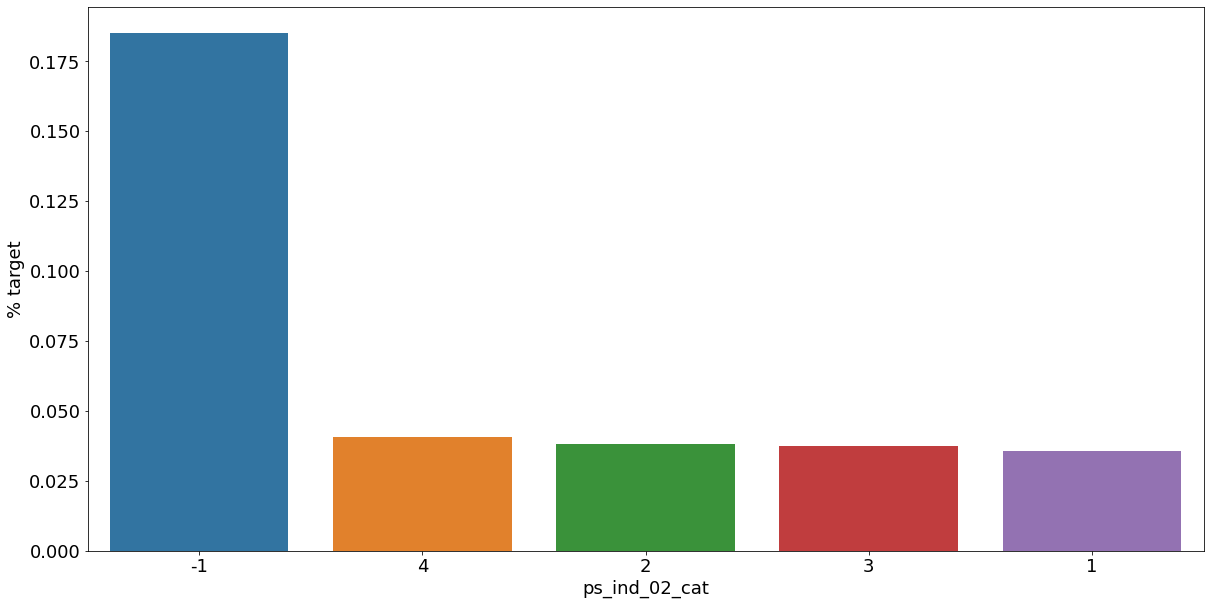

<Figure size 432x288 with 0 Axes>

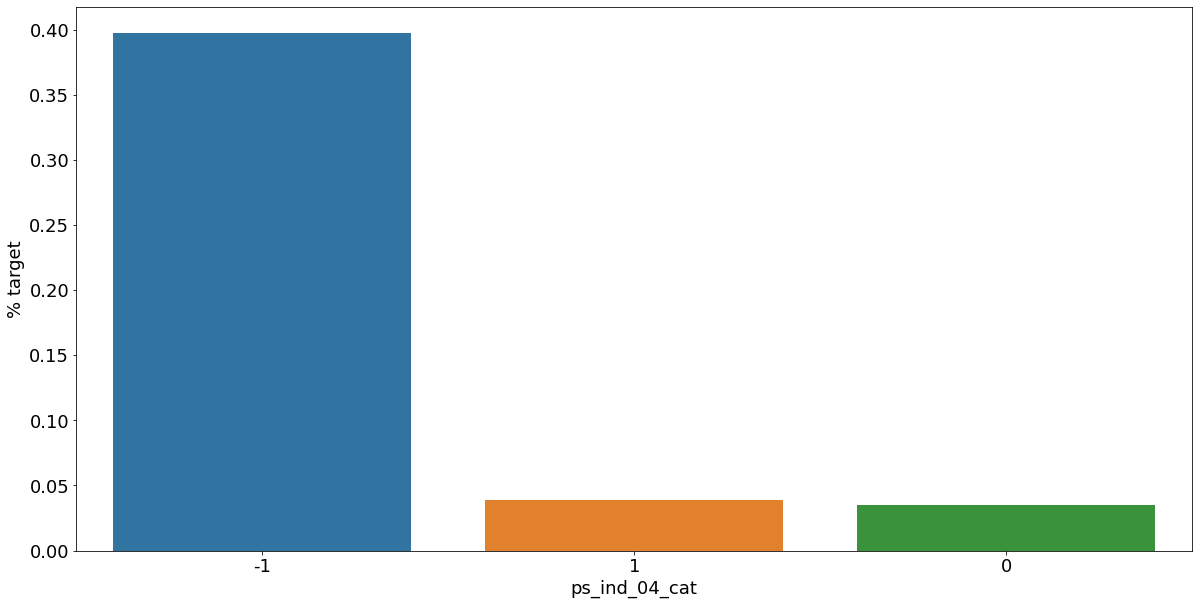

<Figure size 432x288 with 0 Axes>

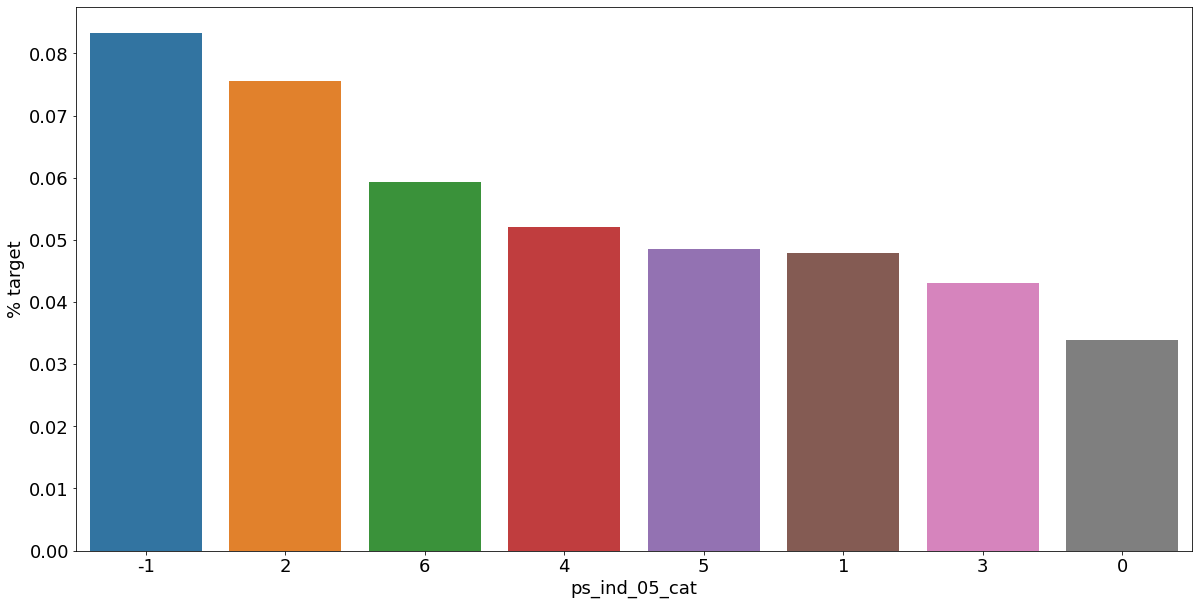

<Figure size 432x288 with 0 Axes>

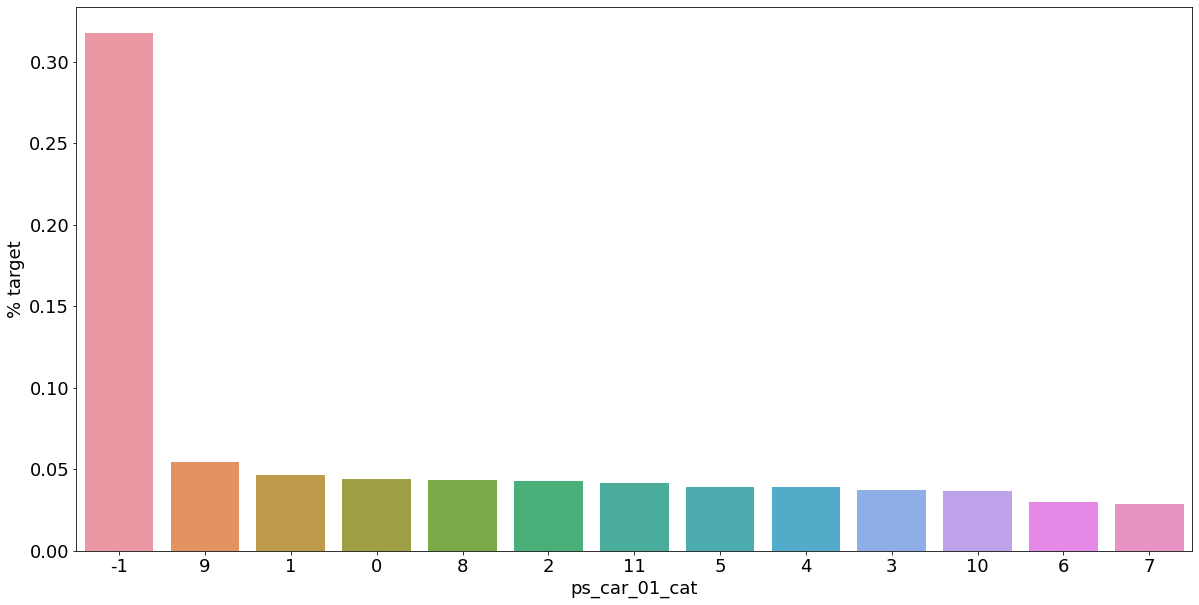

<Figure size 432x288 with 0 Axes>

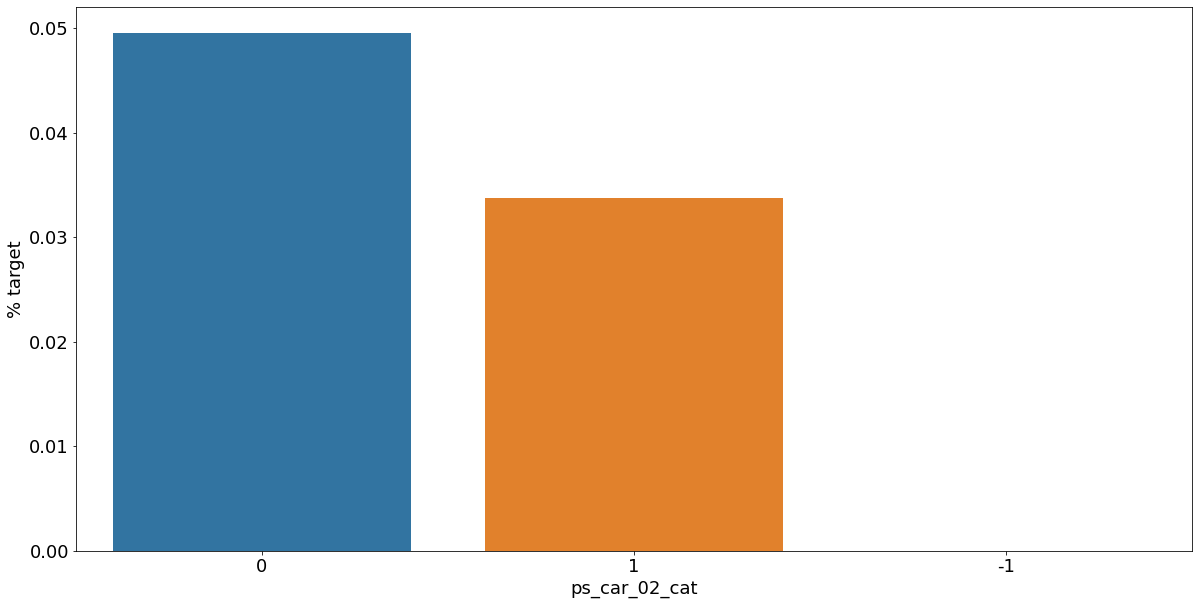

<Figure size 432x288 with 0 Axes>

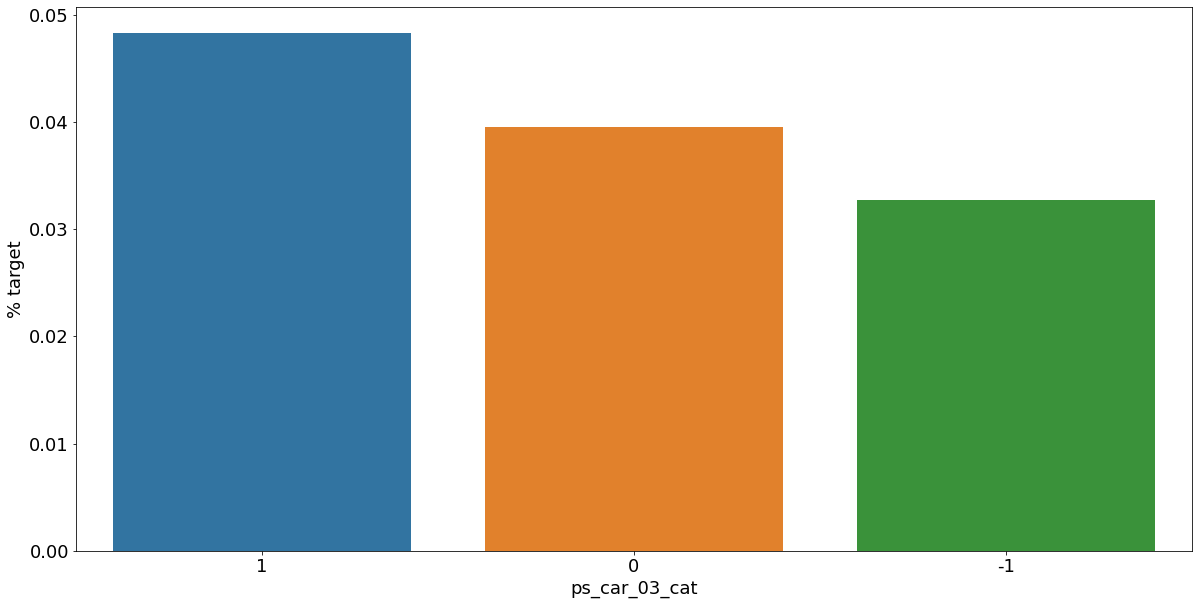

<Figure size 432x288 with 0 Axes>

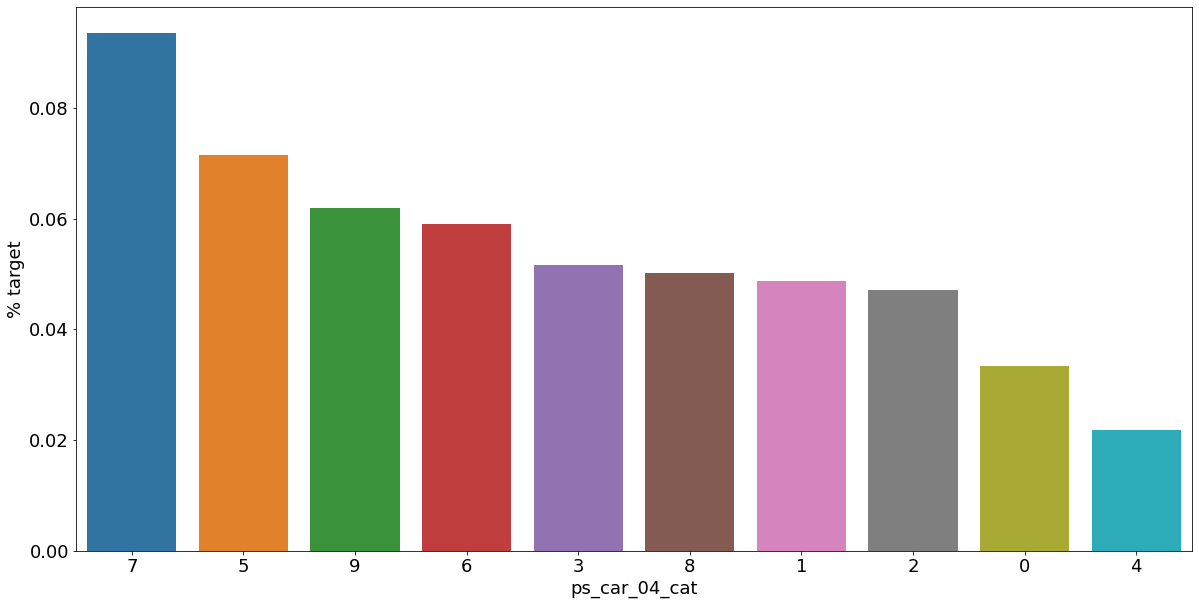

<Figure size 432x288 with 0 Axes>

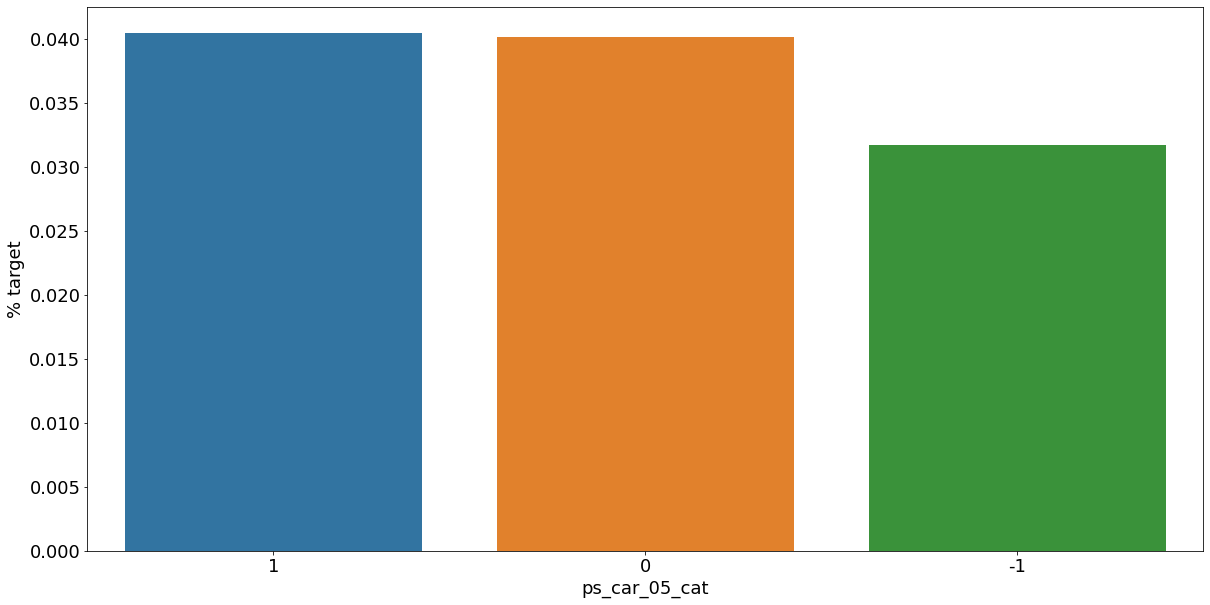

<Figure size 432x288 with 0 Axes>

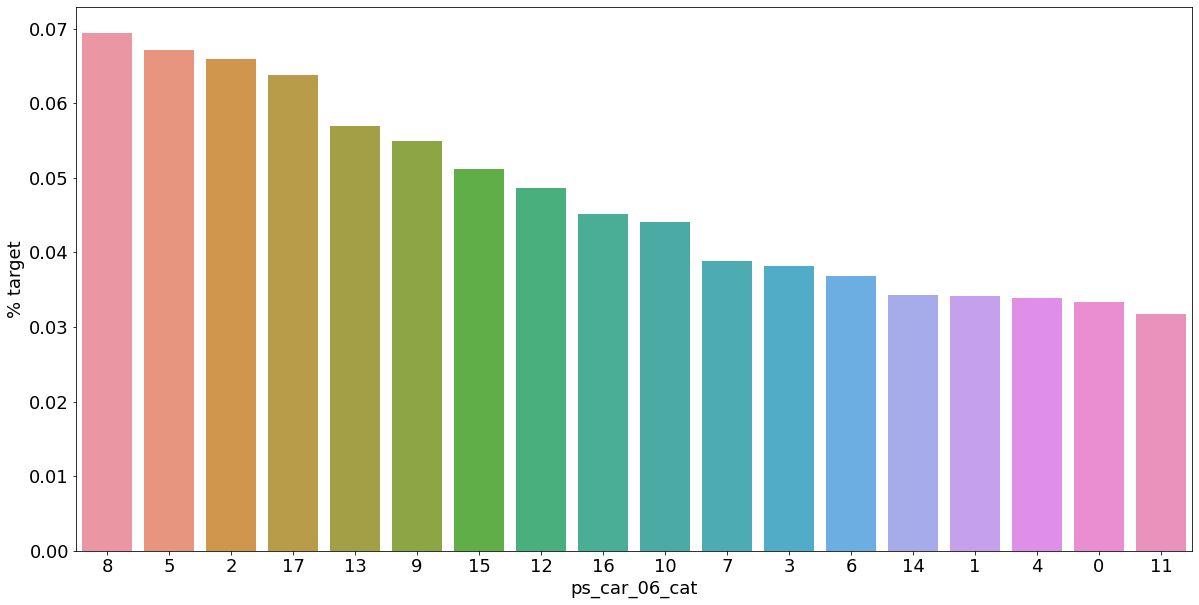

<Figure size 432x288 with 0 Axes>

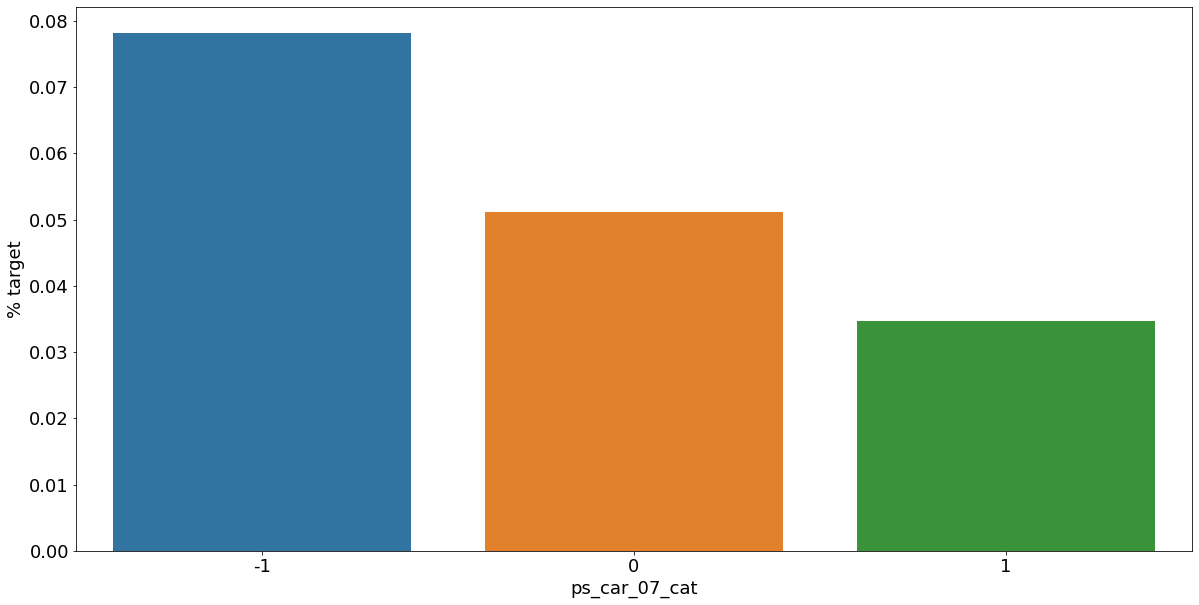

<Figure size 432x288 with 0 Axes>

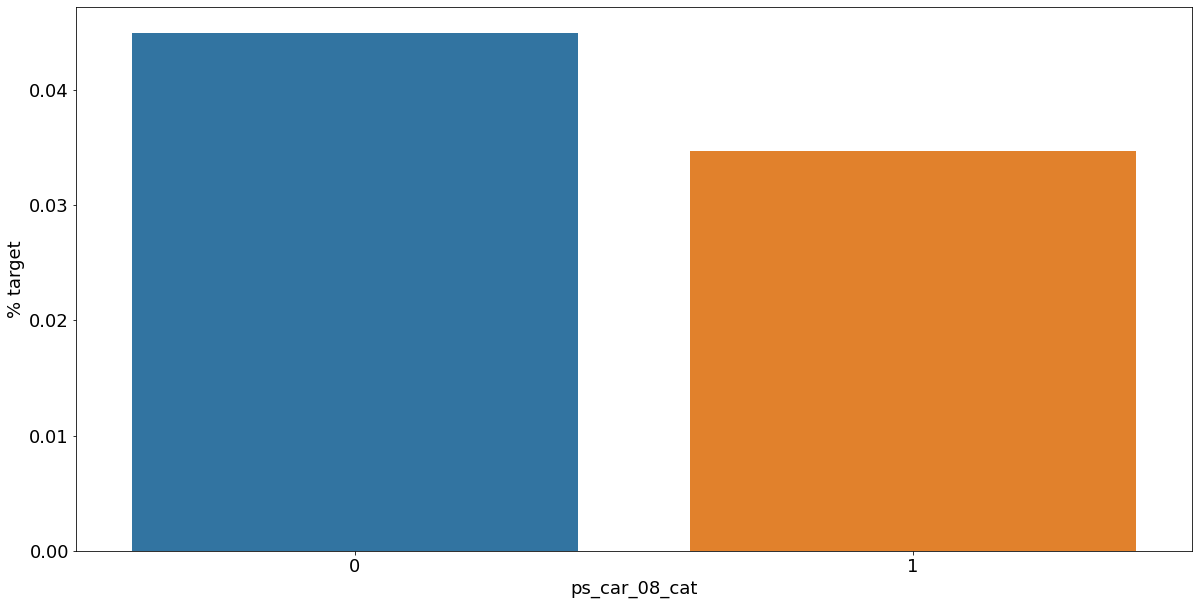

<Figure size 432x288 with 0 Axes>

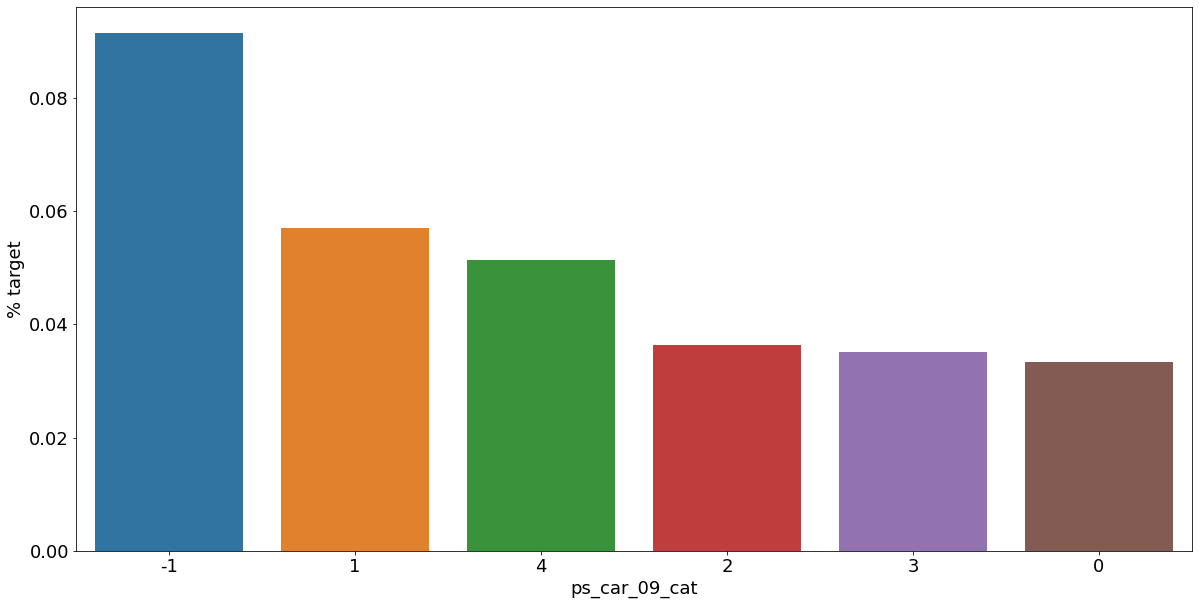

<Figure size 432x288 with 0 Axes>

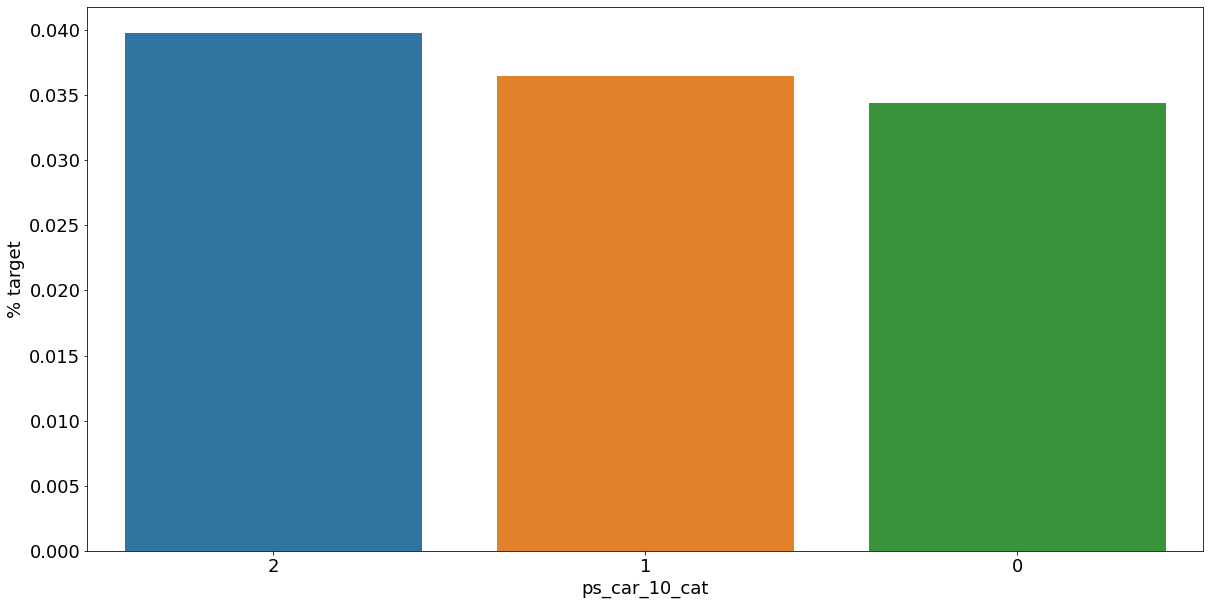

<Figure size 432x288 with 0 Axes>

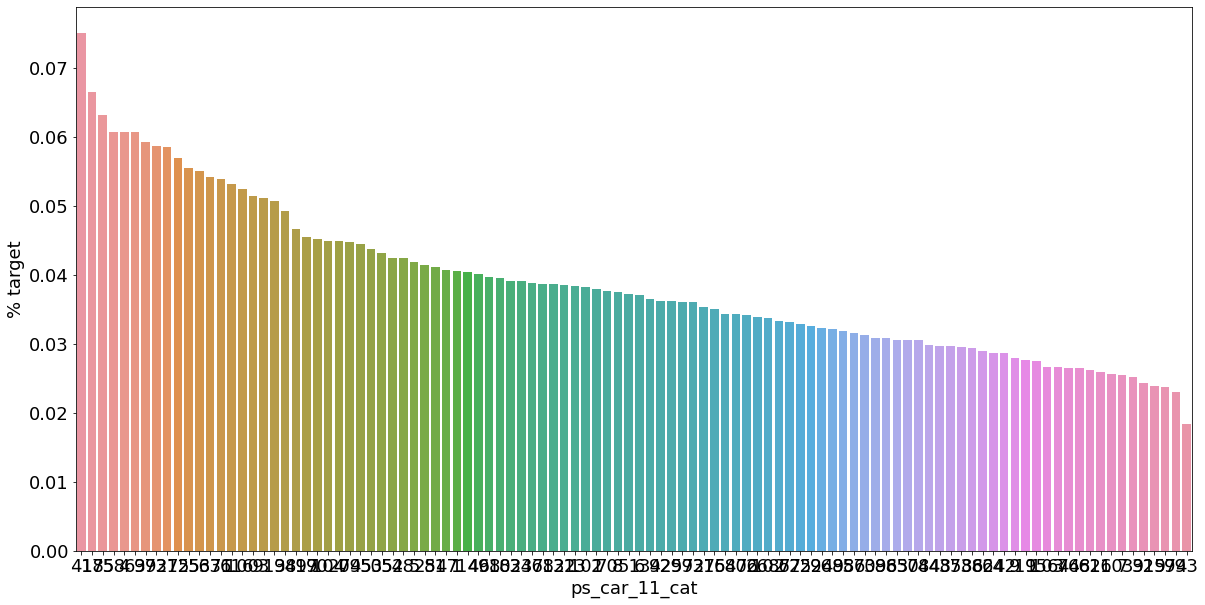

In [19]:
var = feature_desc[(feature_desc.level == 'nominal') & (feature_desc.keep)].index

for feature in var:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    category_perc = train_data[[feature, 'target']].groupby([feature],as_index=False).mean()
    category_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=feature, y='target', data=category_perc, order=category_perc[feature])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(feature, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

It is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

**Interval variables**

Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables. 

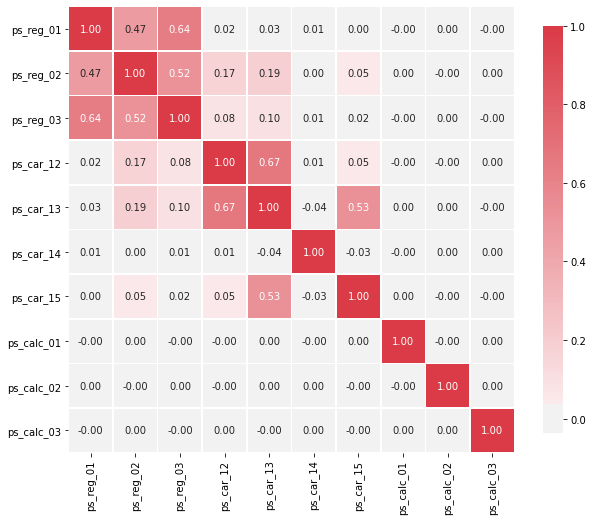

In [20]:
def corr_h(var):
    correls = train_data[var].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correls, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
var = feature_desc[(feature_desc.level == 'interval') & (feature_desc.keep)].index
corr_h(var)

**There are a strong correlations between the variables**:

ps_reg_01 and ps_reg_03 (0.64)

ps_reg_02 and ps_reg_03 (0.52)

ps_car_12 and ps_car13 (0.67)

ps_car_13 and ps_car15 (0.53)

It will be possible to use PCA on the variables to reduce the dimensions . But because  the number of correlated variables is low, we will let the model do the heavy-lifting.

**correlations between ordinal variables¶**

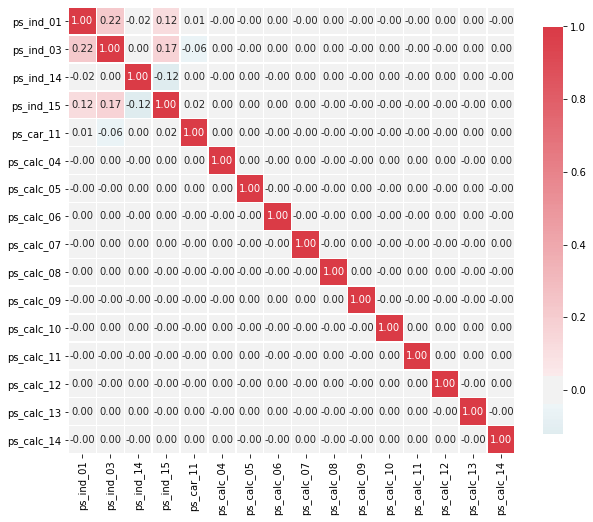

In [21]:
var = feature_desc[(feature_desc.level == 'ordinal') & (feature_desc.keep)].index
corr_h(var)

For the ordinal variables we do not see many correlations.

**Handling imbalanced classes¶**

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. The proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. To deal with that situation, we can randomly resample our dataset. There are two possible strategies to deal with this problem :

-oversampling records with target=1 : Here, weRandomly duplicate examples in the minority class.

-undersampling records with target=0 : Here, we Randomly delete examples in the majority class.

We will choose undersampling method because we have a large traing set 

In [22]:
  apriori=0.10

# Get the indices per target value
indice_0 = train_data[train_data.target == 0].index
indice_1 = train_data[train_data.target == 1].index

# Get original number of records per target value
nber_0 = len(train_data.loc[indice_0])
nber_1 = len(train_data.loc[indice_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-apriori)*nber_1)/(nber_0*apriori)
undersampled_nber_0 = int(undersampling_rate*nber_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nber_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_indice_x = shuffle(indice_0, random_state=37, n_samples=undersampled_nber_0)

# Construct list with remaining indices

indx_list = list(undersampled_indice_x) + list(indice_1)

# Return undersample data frame
train_data = train_data.loc[indx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


**Checking missing values**

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values. Missings values  are represented as -1.
**We can see that ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing value**

In [23]:
features_with_missing = []

for feature in train_data.columns:
    missings = train_data[train_data[feature] == -1][feature].count()
    if missings > 0:
        features_with_missing.append(feature)
        missings_percentage = missings/train_data.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(feature, missings, missings_percentage))
        
print('In total, there are {} variables with missing values'.format(len(features_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


**cardinality of the categorical variables**

 Cardinality refers to the number of different values in a variable. As we will

 create dummy variables from the categorical variables later on, we need to 

 check whether there are variables with many distinct values. We should handle 
 
 these variables differently as they would result in many dummy variables.

In [24]:
var = feature_desc[(feature_desc.level == 'nominal') & (feature_desc.keep)].index

for feature in var:
    dist_values = train_data[feature].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(feature, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_03_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_05_cat has 3 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


**Filling missing values using SimpleImputer**

In [25]:

# Dropping the variables with too many missing values
drop_features = ['ps_car_03_cat', 'ps_car_05_cat']
train_data.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)
feature_desc.loc[(drop_features),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imputer = SimpleImputer(missing_values=-1, strategy='mean')
mode_imputer = SimpleImputer(missing_values=-1, strategy='most_frequent')
train_data['ps_reg_03'] = mean_imputer.fit_transform(train_data[['ps_reg_03']]).ravel()
train_data['ps_car_12'] = mean_imputer.fit_transform(train_data[['ps_car_12']]).ravel()
train_data['ps_car_14'] = mean_imputer.fit_transform(train_data[['ps_car_14']]).ravel()
train_data['ps_car_11'] = mode_imputer.fit_transform(train_data[['ps_car_11']]).ravel()

In [26]:
train_data.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


#**Feature engineering¶**

feature engineering efforts have two goals:

-Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

-Improving the performance of machine learning models.

##**Creating dummy variables¶**

**What are Dummy Variables?**


A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a placebo and 1 may indicate a drug). Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. Numeric variables can also be dummy coded to explore nonlinear effects. Dummy variables are also known as indicator variables, design variables, contrasts, one-hot coding, and binary basis variables.

The values of the categorical variables do not represent any order or 
 magnitude. For instance, category 2 is not twice the value of category 1. Therefore we can create dummy variables to deal with that. We drop the first dummy variable as this information can be derived from the other dummy variables generated for the categories of the original variable.


In [ ]:
var = feature_desc[(feature_desc.level == 'nominal') & (feature_desc.keep)].index
print('Before creating dummy wariables we have {} variables in train'.format(train_data.shape[1]))
train_data = pd.get_dummies(train_data, columns=var, drop_first=True)
print('After creating dummy wariables we have {} variables in train'.format(train_data.shape[1]))

Before creating dummy wariables we have 59 variables in train
After creating dummy wariables we have 213 variables in train


**Selecting features with a Random Forest and SelectFromModel**

SelectFromModel is a meta-transformer that can be used along with any estimator
 that has a coef_ or feature_importances_ attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_  or 
 feature_importances_ values are below the provided threshold parameter. we'll simply select the top 50% best variables.

In [27]:
X_train = train_data.drop(['id', 'target'], axis=1)
y_train = train_data['target']

labels = X_train.columns

clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)


# Train the classifier


clf.fit(X_train, y_train)
importances = clf.feature_importances_
# Print the name and gini importance of each feature
for feature in zip(labels, clf.feature_importances_):
    print(feature)

('ps_ind_01', 0.023747239946949602)
('ps_ind_02_cat', 0.011323026747707658)
('ps_ind_03', 0.03225633013108597)
('ps_ind_04_cat', 0.007957807813248325)
('ps_ind_05_cat', 0.011015516426236152)
('ps_ind_06_bin', 0.00437071864019018)
('ps_ind_07_bin', 0.0048627224990051565)
('ps_ind_08_bin', 0.004550907716261136)
('ps_ind_09_bin', 0.004245248188195843)
('ps_ind_10_bin', 0.0001161663898686715)
('ps_ind_11_bin', 0.00029486751465854715)
('ps_ind_12_bin', 0.0011218206572192158)
('ps_ind_13_bin', 0.00021526187644418338)
('ps_ind_14', 0.0013611477200265113)
('ps_ind_15', 0.03252537721572292)
('ps_ind_16_bin', 0.00539790165578039)
('ps_ind_17_bin', 0.004445413301633384)
('ps_ind_18_bin', 0.004286819050979782)
('ps_reg_01', 0.02364115166002465)
('ps_reg_02', 0.029938390594632578)
('ps_reg_03', 0.052496387652674746)
('ps_car_01_cat', 0.021253119603213577)
('ps_car_02_cat', 0.0044483901907202365)
('ps_car_03_cat', 0.007574617747133182)
('ps_car_04_cat', 0.006684622045549024)
('ps_car_05_cat', 0.0107

**Identify And Select Most Important Features**

With SelectFromModel we can specify which prefit classifier to use and what the 
 threshold is for the feature importances. With the get_support method we can 
 then limit the number of variables in the train data.

In [28]:
sm = SelectFromModel(clf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_f = sm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_f))
select_v = list(labels[sm.get_support()])


Number of features before selection: 57
Number of features after selection: 29


**Feature scaling**

We can apply standard scaling to the training data. Some classifiers perform better when this is done.  Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one.


In [29]:
scaler = StandardScaler()
scaler.fit_transform(train_data.drop(['target'], axis=1))

array([[-0.90494248, -0.45941104, -0.54103958, ..., -0.63441406,
        -0.73248403,  2.34451822],
       [ 0.24006954,  1.55538958, -0.54103958, ..., -0.63441406,
         1.36521748, -0.42652686],
       [ 1.64508122,  1.05168943, -0.54103958, ...,  1.57625762,
        -0.73248403,  2.34451822],
       ...,
       [ 1.73477713, -0.9631112 , -0.54103958, ..., -0.63441406,
        -0.73248403, -0.42652686],
       [ 1.73485162, -0.9631112 ,  0.96226006, ..., -0.63441406,
         1.36521748, -0.42652686],
       [ 1.73512631, -0.45941104,  0.96226006, ..., -0.63441406,
        -0.73248403, -0.42652686]])

#**TRAIN TEST SPLIT**

In [30]:
#######Looking at other models using different classifiers
X = train_data.drop(['id', 'target'], axis=1)
y = train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

#**FUNCTION CLASSIFIER**

In [31]:
def classifier(pro, x, y,X_test,y_test):
    #Passing the model and train test dataset to fit the model
    pro.fit(x, y)
    #Predicting the probabilities of the Tet data
    y2 = pro.predict_proba(X_test)
    y1 = pro.predict(X_test)

    print("Accuracy: ", metrics.accuracy_score(y_test, y1))
    print("Area under the ROC curve: ", metrics.roc_auc_score(y_test, y2[:, 1]))
    #Calculate different metrics
    print("F-metric: ", metrics.f1_score(y_test, y1))
    print(" ")
    print("Classification report:")
    print(metrics.classification_report(y_test, y1))
    print(" ")
    print("Evaluation by cross-validation:")
    print(cross_val_score(pro, x, y))
    
    return pro, y1, y2[:, 1]

# Model to  predict the ROC curve for various models and finding the best one : run_models lets you run many classification models with their default parameters and rank them  AUC.

In [32]:
#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})
        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

#Finding accuracy  using XGB classifier

In [33]:
#Finding accuracy  using XGB classifier
xgb0, y_pred_b, y_pred2_b = classifier(XGBClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.901647152822593
Area under the ROC curve:  0.6353919896819783
F-metric:  0.0015598190609889253
 
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     58679
           1       0.62      0.00      0.00      6403

    accuracy                           0.90     65082
   macro avg       0.76      0.50      0.47     65082
weighted avg       0.87      0.90      0.86     65082

 
Evaluation by cross-validation:
[0.89924931 0.89944686 0.89928223 0.89934477 0.89934477]


**LOGISTIC REGRESSION**

In [34]:
########Logistic Regression ##############
logit, y_p, y_p2 = classifier(LogisticRegression(), X_train, y_train,X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy:  0.9016164223594849
Area under the ROC curve:  0.6114316035517539
F-metric:  0.00031225604996096805
 
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     58679
           1       0.50      0.00      0.00      6403

    accuracy                           0.90     65082
   macro avg       0.70      0.50      0.47     65082
weighted avg       0.86      0.90      0.85     65082

 
Evaluation by cross-validation:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.89918346 0.89921638 0.89934808 0.89934477 0.89931184]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#K nearest Neighbour classifier

In [ ]:
#######K nearest Neighbour classifier ################
knc, y_p, y_p2 = classifier(KNeighborsClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.8952244860330045
Area under the ROC curve:  0.5231022335293403
F-metric:  0.021804619136422322
 
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     58679
           1       0.13      0.01      0.02      6403

    accuracy                           0.90     65082
   macro avg       0.52      0.50      0.48     65082
weighted avg       0.83      0.90      0.85     65082

 
Evaluation by cross-validation:
[0.89193994 0.89322402 0.8937179  0.89322051 0.89325343]


#Decision Tree Classifier

In [35]:
########Decision Tree Classifier ##########
dtc, y_p, y_p2 = classifier(DecisionTreeClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.8076273009434252
Area under the ROC curve:  0.5122273354728304
F-metric:  0.12874043145441894
 
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     58679
           1       0.12      0.14      0.13      6403

    accuracy                           0.81     65082
   macro avg       0.51      0.51      0.51     65082
weighted avg       0.83      0.81      0.82     65082

 
Evaluation by cross-validation:
[0.80903464 0.80472145 0.80524825 0.80662474 0.80524184]


# Running on unbalanced dataset

computing GradientBoosting - Non-balanced 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 
computing XGBClassifier - Non-balanced 


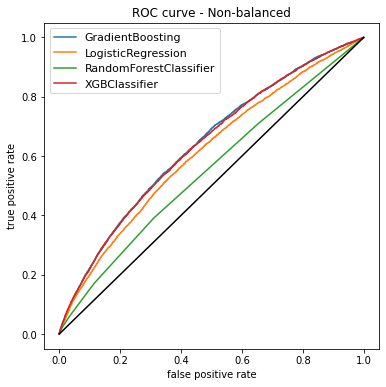

In [36]:
#########Running on unbalanced dataset #############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')

#Synthetically balancing the dataset

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


computing GradientBoosting - Balanced 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 
computing XGBClassifier - Balanced 


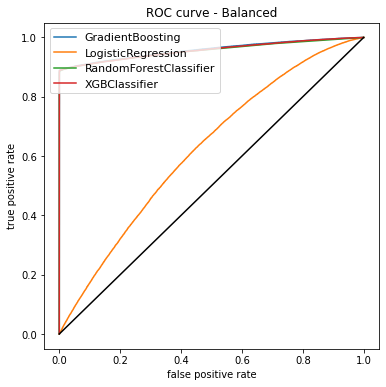

In [37]:
##########Synthetically balancing the dataset##################
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 42)
models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')

**We can conclude that XGB Classifier perform the best**

xGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.


In [41]:
xgb1, y_pred_b, y_pred2_b = classifier(XGBClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.9438554439015396
Area under the ROC curve:  0.9569131031724551
F-metric:  0.9404141979670599
 
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     48890
           1       1.00      0.89      0.94     48733

    accuracy                           0.94     97623
   macro avg       0.95      0.94      0.94     97623
weighted avg       0.95      0.94      0.94     97623

 
Evaluation by cross-validation:
[0.94299519 0.94439512 0.94543654 0.94437805 0.94263569]


In [43]:
################Now we  know that GBM model performed the best 
# save model
xgb1 = XGBClassifier()
xgb1.fit(X, y)
import joblib
joblib.dump(xgb1, 'xgb1.pkl')
# load model
#xgb_pickle = joblib.load('GBM_Model_version1.pkl')

['xgb1.pkl']